In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# https://www.kaggle.com/rtatman/188-million-us-wildfires
# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [59]:
fires_df = pd.read_csv('joined.csv')
fires_df

,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,Month,AverageTemperature,AverageTemperatureUncertainty
0,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA,2,8.689,0.192
1,2004,Lightning,0.25,A,38.933056,-120.404444,CA,5,17.627,0.157
2,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA,5,17.627,0.157
3,2004,Lightning,0.10,A,38.559167,-119.913333,CA,6,21.407,0.325
4,2004,Lightning,0.10,A,38.559167,-119.933056,CA,6,21.407,0.325
...,...,...,...,...,...,...,...,...,...,...
1880460,2015,Missing/Undefined,0.01,A,40.481637,-122.389375,CA,9,NaN,NaN
1880461,2015,Miscellaneous,0.20,A,37.617619,-120.938570,CA,10,NaN,NaN
1880462,2015,Missing/Undefined,0.10,A,37.617619,-120.938570,CA,5,NaN,NaN
1880463,2015,Missing/Undefined,2.00,B,37.672235,-120.898356,CA,10,NaN,NaN


In [60]:
fires_df.sort_values(by='FIRE_SIZE', ascending=False).head(10)

,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,Month,AverageTemperature,AverageTemperatureUncertainty
211296,1997,Lightning,606945.0,G,61.982700,-157.085700,AK,6,11.108,0.254
1579574,2012,Lightning,558198.3,G,42.391894,-117.893687,OR,7,19.193,0.308
1459664,2011,Campfire,538049.0,G,33.606111,-109.449722,AZ,5,17.620,0.137
305585,2004,Lightning,537627.0,G,65.266300,-146.885800,AK,6,12.868,0.330
1215267,2009,Lightning,517078.0,G,64.746700,-149.504700,AK,6,9.873,0.284
153705,2002,Lightning,499945.0,G,42.038889,-123.911667,OR,7,20.276,0.400
305684,2004,Lightning,483280.0,G,66.302900,-149.884300,AK,7,14.112,0.225
352785,2006,Missing/Undefined,479549.0,G,35.667800,-101.370800,TX,3,16.116,0.196
305642,2004,Lightning,463994.0,G,63.816300,-143.819000,AK,6,12.868,0.330
1578265,2012,Lightning,461047.0,G,41.973300,-118.365000,OR,8,19.733,0.253


In [84]:
# Number of fires that burned more than 100,000 acres
(fires_df['FIRE_SIZE'] >= 100000).sum()

184

In [87]:
# number of fires above 100000 acres burned
fires_df[fires_df['FIRE_SIZE'] >= 100000].groupby('STAT_CAUSE_DESCR').count()['FIRE_YEAR'].sort_values(ascending=False)

STAT_CAUSE_DESCR
Lightning            149
Miscellaneous         11
Equipment Use          8
Arson                  6
Missing/Undefined      4
Campfire               3
Debris Burning         2
Powerline              1
Name: FIRE_YEAR, dtype: int64

In [88]:
fires_df['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

# Plot - Cause by Year

### probably fine-tune these if they're to be used

In [62]:
stats = fires_df.groupby('FIRE_YEAR')['STAT_CAUSE_DESCR'].value_counts()

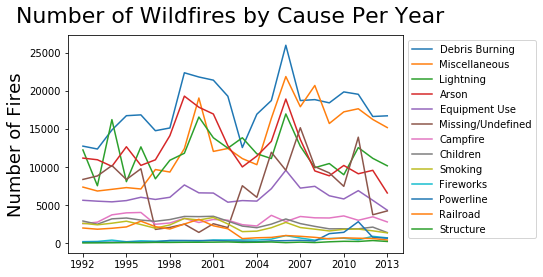

In [63]:
for cause in stats[2013].index.tolist():
    plt.plot(range(1992, 2014), [stats[year][cause] for year in range(1992, 2014)], label=cause)

plt.xticks(range(1992, 2014, 3))
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle('Number of Wildfires by Cause Per Year', size=22)
plt.ylabel('Number of Fires', size=18);

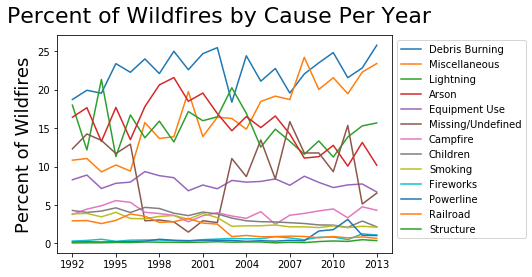

In [64]:
for cause in stats[2013].index.tolist():
    plt.plot(range(1992, 2014), [100*stats[year][cause] / stats[year].sum() for year in range(1992, 2014)], label=cause)

plt.xticks(range(1992, 2014, 3))    
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle('Percent of Wildfires by Cause Per Year', size=22)
plt.ylabel('Percent of Wildfires', size=18);

# Plot - Number of Fires

In [65]:
num_fires = fires_df.groupby('FIRE_YEAR').count()['Month']

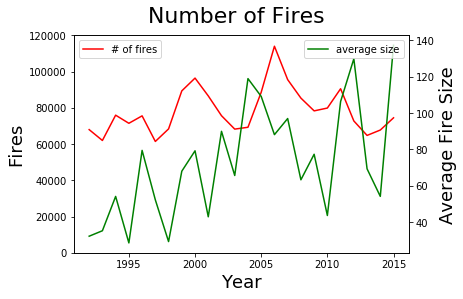

In [79]:
fig, ax1 = plt.subplots()
plt.suptitle('Number of Fires', size=22)

ax1.set_ylabel('Fires', size=18)
ax1.set_xlabel('Year', size=18)
plt.ylim(0, 120000)
ax1.plot(num_fires, c='r', label='# of fires')
plt.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(fires_df.groupby('FIRE_YEAR')['FIRE_SIZE'].mean(), c='g', label='average size')
ax2.set_ylabel('Average Fire Size', size=18);
plt.legend(loc=1);

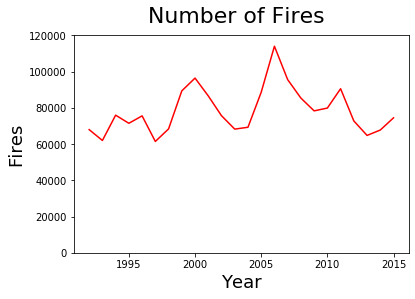

In [67]:
plt.suptitle('Number of Fires', size=22)
plt.ylabel('Fires', size=18)
plt.xlabel('Year', size=18)
plt.ylim(0, 120000)
plt.plot(num_fires, c='r');

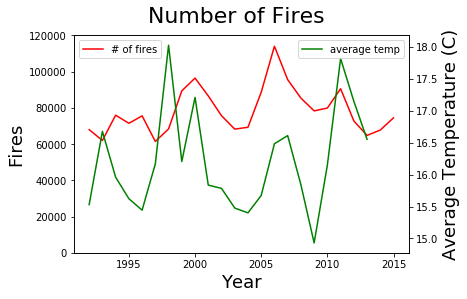

In [78]:
fig, ax1 = plt.subplots()
plt.suptitle('Number of Fires vs Average Temperature', size=22)

ax1.set_ylabel('Fires', size=18)
ax1.set_xlabel('Year', size=18)
plt.ylim(0, 120000)
ax1.plot(num_fires, c='r', label='# of fires')
ax1.legend(loc=2)
ax2 = ax1.twinx()

# should find a different average 
ax2.plot(fires_df.groupby('FIRE_YEAR')['AverageTemperature'].mean(), c='g', label='average temp') 
ax2.set_ylabel('Average Temperature (C)', size=18);
ax2.legend();

# Average Fire Size by Cause

In [9]:
# avgf = fires_df['FIRE_SIZE'].mean()
avgf = fires_df[fires_df['FIRE_SIZE_CLASS'] != 'G']['FIRE_SIZE'].mean()

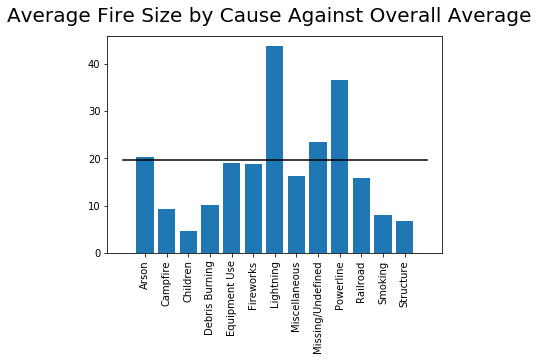

In [10]:
avg_sizes = fires_df[fires_df['FIRE_SIZE_CLASS'] != 'G'].groupby('STAT_CAUSE_DESCR').mean()['FIRE_SIZE']
plt.bar(range(len(avg_sizes)), height=avg_sizes)
plt.plot(plt.xlim(), [avgf for i in range(2)], c='black')
plt.xticks(ticks=range(len(avg_sizes)), labels=avg_sizes.index.tolist(), rotation=90)
plt.suptitle('Average Fire Size by Cause Against Overall Average', size=20);

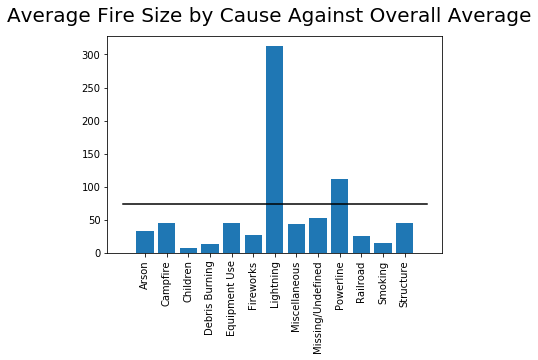

In [49]:
avgf = fires_df['FIRE_SIZE'].mean()

avg_sizes = fires_df.groupby('STAT_CAUSE_DESCR').mean()['FIRE_SIZE']
plt.bar(range(len(avg_sizes)), height=avg_sizes)
plt.plot(plt.xlim(), [avgf for i in range(2)], c='black')
plt.xticks(ticks=range(len(avg_sizes)), labels=avg_sizes.index.tolist(), rotation=90)
plt.suptitle('Average Fire Size by Cause Against Overall Average', size=20);

# Plots w/ Temperature

In [11]:
temp_df = fires_df[~np.isnan(fires_df['AverageTemperature'])]
# temp_df = temp_df[temp_df['FIRE_SIZE_CLASS'] != 'A']
temp_df

,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,Month,AverageTemperature,AverageTemperatureUncertainty
0,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA,2,8.689,0.192
1,2004,Lightning,0.25,A,38.933056,-120.404444,CA,5,17.627,0.157
2,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA,5,17.627,0.157
3,2004,Lightning,0.10,A,38.559167,-119.913333,CA,6,21.407,0.325
4,2004,Lightning,0.10,A,38.559167,-119.933056,CA,6,21.407,0.325
...,...,...,...,...,...,...,...,...,...,...
1880418,2010,Equipment Use,0.25,A,39.276098,-123.094567,CA,6,20.665,0.224
1880419,2010,Missing/Undefined,50.00,C,32.906591,-116.942448,CA,5,14.202,0.186
1880420,2010,Equipment Use,2.10,B,40.555183,-124.136117,CA,8,22.987,0.330
1880427,2013,Children,4.50,B,34.633333,-118.966666,CA,4,14.707,0.283


In [12]:
ca_df = temp_df[temp_df['STATE']=='CA']
x = ca_df.groupby(['FIRE_YEAR', 'Month']).mean()['AverageTemperature'].tolist()
y = ca_df.groupby(['FIRE_YEAR', 'Month']).count()['FIRE_SIZE'].tolist()
y2 = ca_df.groupby(['FIRE_YEAR', 'Month']).mean()['FIRE_SIZE'].tolist()

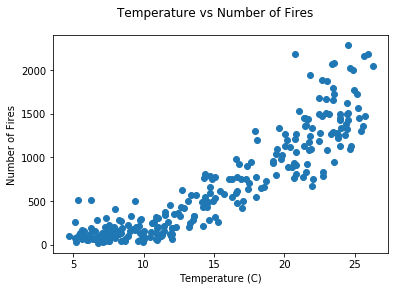

In [13]:
plt.suptitle('Temperature vs Number of Fires')
plt.xlabel('Temperature (C)')
plt.ylabel('Number of Fires')
plt.scatter(x,y);

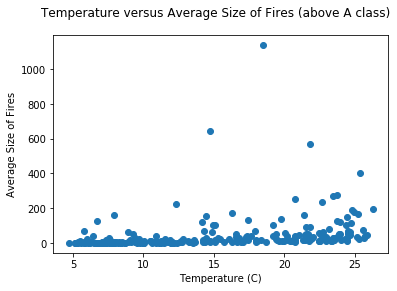

In [14]:
plt.suptitle('Temperature versus Average Size of Fires (above A class)')
plt.xlabel('Temperature (C)')
plt.ylabel('Average Size of Fires')
plt.scatter(x,y2);

In [15]:
# could switch this back to ca_df
temp_df = fires_df[~np.isnan(fires_df['AverageTemperature'])]
temp_df['Temperature'] = temp_df['AverageTemperature'].apply(lambda x: int(x))

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
#temp2_df = temp_df[temp_df['FIRE_SIZE_CLASS'] != 'G']
temps = temp_df.groupby('Temperature')

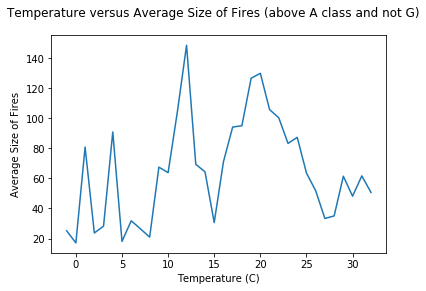

In [17]:
# outliers carry the average, so got rid of largest class
# California fires with class B through F
plt.suptitle('Temperature versus Average Size of Fires (above A class and not G)')
plt.xlabel('Temperature (C)')
plt.ylabel('Average Size of Fires')
plt.plot(temps.mean().index.tolist()[17:], temps.mean()['FIRE_SIZE'][17:]);

In [18]:
# Do wildfires get worse as temperature rises?
# - Do the percent of worse fires go up (plot the fire size group var versus temperature over year)

In [19]:
temps = temp_df.groupby('Temperature')['FIRE_SIZE_CLASS'].value_counts()

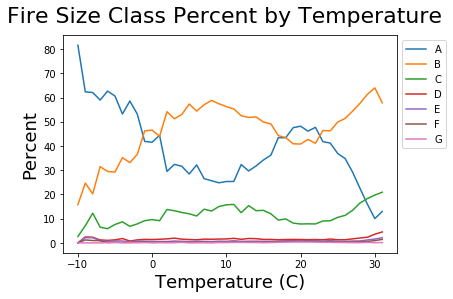

In [20]:
for categ in sorted(temps[26].index.tolist()):
    ph = []
    for temper in range(temps.index[29][0], temps.index[-1][0]):
        try:
            ph.append(100* temps[temper][categ] / temps[temper].sum())
        except:
            ph.append(0)
    plt.plot(range(temps.index[29][0], temps.index[-1][0]), ph, label=categ)

#plt.xticks(range(1992, 2014, 3))
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle('Fire Size Class Percent by Temperature', size=22)
plt.xlabel('Temperature (C)', size=18)
plt.ylabel('Percent', size=18);

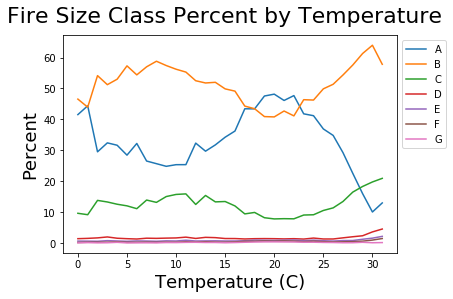

In [21]:
# only 0+ degrees

for categ in sorted(temps[26].index.tolist()):
    ph = []
    for temper in range(0, temps.index[-1][0]):
        try:
            ph.append(100* temps[temper][categ] / temps[temper].sum())
        except:
            ph.append(0)
    plt.plot(range(0, temps.index[-1][0]), ph, label=categ)

#plt.xticks(range(1992, 2014, 3))
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle('hi', size=22)
plt.ylabel('hi', size=18);
plt.suptitle('Fire Size Class Percent by Temperature', size=22)
plt.xlabel('Temperature (C)', size=18)
plt.ylabel('Percent', size=18);

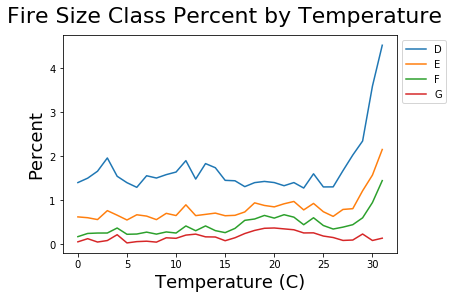

In [22]:
# only four largest groups

for categ in sorted(temps[26].index.tolist()[3:]):
    ph = []
    for temper in range(0, temps.index[-1][0]):
        try:
            ph.append(100* temps[temper][categ] / temps[temper].sum())
        except:
            ph.append(0)
    plt.plot(range(0, temps.index[-1][0]), ph, label=categ)

#plt.xticks(range(1992, 2014, 3))
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle('Fire Size Class Percent by Temperature', size=22)
plt.xlabel('Temperature (C)', size=18)
plt.ylabel('Percent', size=18);

In [23]:
# Pitfall
# Temperature is match with discovery of fire. Especially for longer fires, temperature can change a lot

# Plot - Month

In [24]:
fires_df.groupby('Month').count()['FIRE_SIZE']
fires_df.groupby('Month').mean()['FIRE_SIZE']

Month
1      19.672581
2      24.074019
3      28.864335
4      35.484933
5      60.292530
6     212.423204
7     139.941697
8     137.727005
9      45.857188
10     36.979441
11     22.326617
12     15.219623
Name: FIRE_SIZE, dtype: float64

# Finally ML (For Play)

In [25]:
temp_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,Month,AverageTemperature,AverageTemperatureUncertainty,Temperature
0,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA,2,8.689,0.192,8
1,2004,Lightning,0.25,A,38.933056,-120.404444,CA,5,17.627,0.157,17
2,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA,5,17.627,0.157,17
3,2004,Lightning,0.10,A,38.559167,-119.913333,CA,6,21.407,0.325,21
4,2004,Lightning,0.10,A,38.559167,-119.933056,CA,6,21.407,0.325,21


In [26]:
# need to encode cause
# need to drop size or size_class
# drop state, month, year?

# regression or classification depending on fire size kept

In [27]:
ml_df = temp_df.drop(['STATE', 'AverageTemperatureUncertainty', 'Temperature'], 
                     axis=1)
ml_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,Month,AverageTemperature
0,2005,Miscellaneous,0.10,A,40.036944,-121.005833,2,8.689
1,2004,Lightning,0.25,A,38.933056,-120.404444,5,17.627
2,2004,Debris Burning,0.10,A,38.984167,-120.735556,5,17.627
3,2004,Lightning,0.10,A,38.559167,-119.913333,6,21.407
4,2004,Lightning,0.10,A,38.559167,-119.933056,6,21.407


In [28]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(ml_df[['STAT_CAUSE_DESCR']]);

In [29]:
ohe_df = pd.DataFrame(enc.transform(ml_df[['STAT_CAUSE_DESCR']]).toarray(), columns=enc.get_feature_names(['STAT_CAUSE_DESCR']))

In [30]:
ml_df.reset_index(drop=True, inplace=True)

for col in ohe_df:
    ml_df[col] = ohe_df[col]

In [31]:
ml_df.drop(['STAT_CAUSE_DESCR'], axis=1, inplace=True)
ml_df.head()

,FIRE_YEAR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,Month,AverageTemperature,STAT_CAUSE_DESCR_Arson,STAT_CAUSE_DESCR_Campfire,STAT_CAUSE_DESCR_Children,STAT_CAUSE_DESCR_Debris Burning,STAT_CAUSE_DESCR_Equipment Use,STAT_CAUSE_DESCR_Fireworks,STAT_CAUSE_DESCR_Lightning,STAT_CAUSE_DESCR_Miscellaneous,STAT_CAUSE_DESCR_Missing/Undefined,STAT_CAUSE_DESCR_Powerline,STAT_CAUSE_DESCR_Railroad,STAT_CAUSE_DESCR_Smoking,STAT_CAUSE_DESCR_Structure
0,2005,0.10,A,40.036944,-121.005833,2,8.689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2004,0.25,A,38.933056,-120.404444,5,17.627,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2004,0.10,A,38.984167,-120.735556,5,17.627,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2004,0.10,A,38.559167,-119.913333,6,21.407,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004,0.10,A,38.559167,-119.933056,6,21.407,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
ml_df = ml_df[ml_df['FIRE_SIZE_CLASS'] != 'A']

regr_df = ml_df.drop(['FIRE_SIZE_CLASS'], axis=1) # y = FIRE_SIZE
clas_df = ml_df.drop(['FIRE_SIZE'], axis=1) # y = FIRE_SIZE_CLASS

In [33]:
# or split first and then encode? ...na

# Classification

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    clas_df.drop(['FIRE_SIZE_CLASS'], axis=1), clas_df[['FIRE_SIZE_CLASS']], test_size=0.25, random_state=2)

In [35]:
# first try
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [36]:
neigh.fit(X_train, y_train)

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
y_preds = neigh.predict(X_test)

In [38]:
(y_preds == y_test['FIRE_SIZE_CLASS']).sum() / len(y_preds)

0.7394369508679406

In [39]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, plot_confusion_matrix

In [40]:
for n in [2,3,4,5,6,7]:
    print('*'*20)
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train['FIRE_SIZE_CLASS'])
    y_preds = neigh.predict(X_test)
    print(n, (y_preds == y_test['FIRE_SIZE_CLASS']).sum() / len(y_preds))
    print(accuracy_score(y_test['FIRE_SIZE_CLASS'], y_preds))
    print(balanced_accuracy_score(y_test['FIRE_SIZE_CLASS'], y_preds))

********************
2 0.7568210837773413
0.7568210837773413
0.20162280017084236
********************
3 0.7394369508679406
0.7394369508679406
0.21265325489605394
********************
4 0.7585934984934475
0.7585934984934475
0.20958549867796306
********************
5 0.7525745228044665
0.7525745228044665
0.2095352860667992
********************
6 0.7626085604013615
0.7626085604013615
0.20173423860720677
********************
7 0.7586983965072579
0.7586983965072579
0.20179672365360468


In [41]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train['FIRE_SIZE_CLASS'])
y_preds = neigh.predict(X_test)
print(n, (y_preds == y_test['FIRE_SIZE_CLASS']).sum() / len(y_preds))
print(balanced_accuracy_score(y_test['FIRE_SIZE_CLASS'], y_preds))

7 0.7585934984934475
0.20958549867796306


In [42]:
confusion_matrix(y_test['FIRE_SIZE_CLASS'], y_preds)

array([[201843,  10229,    566,    258,    141,     67],
       [ 42616,   7430,    447,    185,     83,     44],
       [  5023,   1270,    231,    104,     48,     20],
       [  2396,    552,    115,    100,     49,     20],
       [  1291,    284,     67,     57,     63,     24],
       [   574,    134,     28,     19,     28,     53]], dtype=int64)

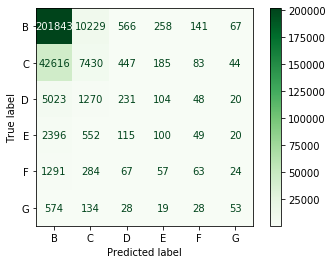

In [43]:
plot_confusion_matrix(neigh, X_test, y_test['FIRE_SIZE_CLASS'], values_format='d', cmap='Greens');

In [44]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [45]:
rf = RandomForestClassifier(max_depth=6, n_estimators=100)
rf.fit(X_train, y_train['FIRE_SIZE_CLASS'])
y_preds = rf.predict(X_test)
print((y_preds == y_test['FIRE_SIZE_CLASS']).sum() / len(y_preds))
print(balanced_accuracy_score(y_test['FIRE_SIZE_CLASS'], y_preds))

0.7708340115532503
0.16666666666666666


In [46]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train['FIRE_SIZE_CLASS'])
y_preds = ab.predict(X_test)
print((y_preds == y_test['FIRE_SIZE_CLASS']).sum() / len(y_preds))
print(balanced_accuracy_score(y_test['FIRE_SIZE_CLASS'], y_preds))

0.7708303943803602
0.1666658845759191


In [47]:
nb = GaussianNB()
nb.fit(X_train, y_train['FIRE_SIZE_CLASS'])
y_preds = nb.predict(X_test)
print((y_preds == y_test['FIRE_SIZE_CLASS']).sum() / len(y_preds))
print(balanced_accuracy_score(y_test['FIRE_SIZE_CLASS'], y_preds))

0.5614792790250995
0.2788409633166867


In [48]:
ml_df['FIRE_SIZE_CLASS'].value_counts()

B    853958
C    201911
D     26268
E     13102
F      7220
G      3377
Name: FIRE_SIZE_CLASS, dtype: int64